#**DECISION TREE**

##AIM: DECISION TREE IMPLEMENTATION

A decision tree is a type of supervised learning algorithm used in machine learning and data mining. It is a tree-like model where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome or predicted value. Decision trees can be used for both classification and regression tasks.



###### **DECISION TREE IMPLEMENTATION FROM SCRATCH USING PYTHON**



In [ ]:
import pandas as pd
import numpy as np
import math
import graphviz

# **GET DATA**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/MyDrive/MachineLearning/09-01-2023/data.csv"
data="/content/drive/MyDrive/MachineLearning/09-01-2023/drug200.csv"
#/content/drive/MyDrive/MachineLearning/09-01-2023/data.csv

Mounted at /content/drive


In [ ]:
# df=pd.read_csv(data)
df=pd.read_csv(path)
# df=df.iloc[:,1:]
# df=df.iloc[:,df.columns != "Na_to_K"]
df

,OUTLOOK,TEMP,HUMIDITY,WIND,PLAY TENNIES
0,sunny,hot,high,weak,no
1,sunny,hot,high,strong,no
2,overcast,hot,high,weak,yes
3,rain,mild,high,weak,yes
4,rain,cool,normal,weak,yes
5,rain,cool,normal,strong,no
6,overcast,cool,normal,strong,yes
7,sunny,mild,high,weak,no
8,sunny,cool,normal,weak,yes
9,rain,mild,normal,weak,yes


#**DECISION TREE IMPLEMENTATION**



*   N-ARRAY -TREE IMPLEMENTATION
*   DECISION TREE CONSTRUCTION
*   GRAPH IMPLEMENTATION





The process of creating a decision tree involves recursively splitting the dataset into smaller subsets based on the features that provide the most information gain (i.e., the most relevant feature). Information gain is a measure of the difference in entropy (i.e., measure of impurity) before and after the split. The goal is to create a tree that predicts the target variable with high accuracy while minimizing the number of splits or tree depth.

## N-ARRAY IMPLEMENTATION

>The Node class represents a node in an n-ary tree, where each node has a name, a value, and a list of children. The add_child method allows you to add a child node to a parent node.

In [ ]:
class Node():
  def __init__(self, name, value):
    self.name = name
    self.value = value
    self.children = []
    self.label=[]
        
  def add_child(self, node):
    self.children.append(node)

  def add_label(self, label):
    self.label.append(label)

  def print_node(self):
    print(self.name or self.value)
    for i in self.children:
      i.print_node()  

In [ ]:
class Tree():
  def __init__(self,node):
    self.root = node
  def printTree(self):
    self.root.print_node()

#INFORMATION GAIN

>$$ Info(p,A) = E(p) - E(p|A) $$
>$$ E(p) = -\sum_{i=1}^{n} p_i \log_2 p_i $$
>$$ E(p|A) = \sum_{i=1}^{n} p_i E(p|A=a_i) $$

or



Formula for Entropy and Gini index:

$$Entropy=-\sum_{i=1}^{c}(P(x_i)log_2P(x_i))$$

or 

$$ G(X) = 1 - \sum_{i=1}^{n} p_i^2 $$
where $G(X)$ is the Gini index of a set $X$, $n$ is the number of classes, and $p_i$ is the proportion of examples in $X$ that belong to class $i$.


In [ ]:
def entropy(self, p):
    if p == 0 or p == 1:
        return 0
    return -(p * math.log2(p) + (1 - p) * math.log2(1 - p))

# **IMPLEMENTATION**

>The DecisionTree class is used to construct and predict values using a decision tree. It has several methods:

>__init__: This method is used to initialize the decision tree and decide on the data members that it will use.

>construct: This method is used to construct the decision tree by calling the splitbycolumn and informationgain methods.

>predict: This method is used to predict the value for a given input using the constructed decision tree.

>splitbycolumn: This method is used to split the data into different groups based on the values in a particular column.

>informationgain: This method is used to calculate the information gain for each column, which is used to determine which column to split the data on at each step of the tree construction.

In [ ]:

class DecisionTree:
    def __init__(self, dataset, target_feature):
      # Initialize an empty list of labels for visualization and construct the decision tree
        self.root = self.construct(dataset, target_feature)

    def construct(self, dataset, target_feature):
        # If the dataset is empty, return a leaf node with no value
        if len(dataset) == 0:
            return Node(None, None)
        # If all the values in the target feature are the same, return a leaf node with that value
        if len(dataset[target_feature].unique()) == 1:
            return Node(None, dataset[target_feature].iloc[0])
        # If there are no more features to split on, return a leaf node with the most common value in the target feature
        if len(dataset.columns) == 1:
            return Node(None, self.most_common_target(dataset, target_feature))

        # Initialize variables to keep track of the best feature to split on and the highest information gain
        max_gain = 0
        best_feature = None

        # Calculate the information gain for each feature
        for feature in dataset.columns:
            # Skip the target feature
            if feature == target_feature:
                continue
            gain = self.information_gain(dataset, feature, target_feature)
            # If this feature has a higher information gain, update the best feature and the highest information gain
            if gain > max_gain:
                max_gain = gain
                best_feature = feature

        # Create a new root node with the best feature and highest information gain
        root_node = Node(best_feature, max_gain)
        # Split the dataset into subsets based on the values of the best feature
        splits = self.splitbycolumn(dataset, best_feature)
        # Iterate over the subsets and construct a decision tree for each one
        for i, split in splits.items():
            # Create a new dataset without the best feature
            new_dataset = split.drop(best_feature, axis=1)
            # Construct a decision tree for this subset
            child = self.construct(new_dataset, target_feature)
            # Add the label for this split to the list of labels for the root node
            root_node.add_label(str(i))
            # Add the child tree as a child of the root node
            root_node.add_child(child)
        # Return the root node
        return root_node

    def splitbycolumn(self, dataset, feature):
        # Create a dictionary to store the splits
        split = {}
        # Get the unique values of the feature
        d = dataset[feature].unique()
        # Split the dataset into subsets based on the values of the feature
        for val in d:
            split[val] = dataset.loc[dataset[feature] == val]
        # Return the dictionary of splits
        return split

    """
    Entropy: This function calculates the entropy of a given probability value. 
    If the probability is 0 or 1 (i.e., certain to happen or certain not to happen), 
    the entropy is 0. Otherwise, the entropy is calculated as -1 times the probability multiplied by the log base 2 of the probability. 
    This function is used to measure the impurity or disorder in a set of data.
    """

    def entropy(self, p):
        # If probability is 0 or 1, return 0 as entropy is 0 for certain outcomes
        if p == 0 or p == 1:
            return 0
        # Otherwise, calculate entropy using formula -p * log(p, 2)
        return -1*(p * math.log(p,2))

    """
    calculate_p: This function calculates the probability of each value in a given feature (column) of a dataset.
    It does this by counting the number of occurrences of each value in the feature, 
    dividing by the total number of instances in the dataset, and returning a dictionary mapping values to their probabilities.
    """

    def calculate_p(self, dataset, feature):
        # Get total number of instances in dataset
        n = len(dataset)
        # Initialize dictionary to store counts of each value in feature
        count = {}
        # Get all values in feature
        d = dataset[feature]
        # Iterate through values and update count dictionary
        for val in d:
          if val in count:
            count[val] += 1
          else:
            count[val] = 1
        # Initialize dictionary to store probabilities
        probability = {}
        # Calculate probability of each value by dividing count by total number of instances
        for val, counter in count.items():
          probability[val] = counter/n
        # Return dictionary of probabilities
        return probability


    """
    information_gain: This function calculates the information gain of a given feature for a given dataset and target.
    It does this by first calculating the total entropy of the target feature using the entropy function.
    It then splits the dataset by the given feature and calculates the entropy of each split using the entropy function.
    The information gain is then calculated as the difference between the total entropy and the sum of the entropies of the splits,
    weighted by their probability (determined by the calculate_p function).
    Information gain is used to determine which feature is the most useful for splitting the data.
    """


    def information_gain(self, dataset, feature, target):
        # Calculate total entropy of target feature
        total_entropy = 0
        # Get probabilities of each value in target feature
        p = self.calculate_p(dataset, target)
        # Sum entropy of each value using entropy function
        for i, val in p.items():
          total_entropy += self.entropy(val)
        # Split dataset by feature and calculate entropy of each split
        splits = self.splitbycolumn(dataset, feature)
        # Get probabilities of each value in feature
        fp = self.calculate_p(dataset, feature)
        feature_entropy = 0
        # Calculate sum of entropies of splits, weighted by probability
        for i, split in splits.items():
          # Get probabilities of each value in target feature of split
          p = self.calculate_p(split, target)
          e = 0
          # Calculate entropy of split
          for j, val in p.items():
            e += self.entropy(val)
          # Add weighted entropy to feature_entropy
          feature_entropy += (fp[i] * e)
        # Calculate information gain as total entropy minus sum of entropies of splits
        inf_gain = total_entropy - feature_entropy
        # Return information gain
        return inf_gain


    """
    _most_common_target: This function returns the most common value in the target feature of a given dataset. 
    It does this by using the mode method of the target column and returning the first element of the resulting mode.
    This function is likely used as a prediction for leaf nodes in the decision tree.
    """

    def most_common_target(self, dataset, target):
        # Return the most common value in the target feature using the mode method
        return dataset[target].mode()[0]

    def predict(self,test):
        predictions=[]
        for _,row in test.iterrows():
          node=self.root
          while(node.name):
            feature=node.name
            val=row[feature]
            index=node.label.index(val)
            node=node.children[index]
          predictions.append(node.value)
        return predictions

    def accuracy(self,actual,predicted):
        actual=list(actual)
        predicted=list(predicted)
        correct=0
        for i in range(len(actual)):
          if actual[i]==predicted[i]:
            correct+=1
        
        return (correct/len(actual))*100




VISUALIZE USING GRAPHVIZ

>To integrate the two classes and display the decision tree using Graphviz, you will need to install the graphviz library and use its Digraph class to create a directed graph. You can then use the render method to generate a visual representation of the decision tree.

In [ ]:
def visualize(node, graph):
  if node is None:
    return
  if node.name is None:
    return
  if node.children:
    graph.node(node.name)
    with graph.subgraph() as s:
      # s.attr(rank='same')
      i=0
      for child in node.children:
        if child:
          p=child.name or str(child.value)
          # print(p)
          s.node((child.name or node.label[i]+str(child.value)),p)
          s.edge(node.name,(child.name or node.label[i]+str(child.value)),label=node.label[i])
          i+=1
          visualize(child, graph)
    # for child in node.children:
  else:
    graph.node(node.name, node.name + '\n' + str(node.value))
        


# **IMPLEMENTATION - OUTPUT**

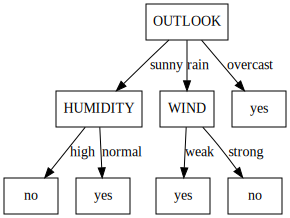

In [ ]:
d=DecisionTree(df,"PLAY TENNIES")
# d=DecisionTree(df,"Drug")
tree=Tree(d.root)
graph = graphviz.Digraph(node_attr={'shape': 'rectangle'})
if d.root is not None:
  visualize(d.root, graph)
graph

# **PREDICT**

In [ ]:
#.sample(frac=1) - to shuffle
test=df.iloc[0:5,:-1]
r_test=df.iloc[0:5,-1]
print(df.loc[0])

# test.iloc[1:,2]="normal"
test_data = pd.DataFrame({
    'OUTLOOK': ['sunny'],
    'TEMPERATURE': ['aa'],
    'HUMIDITY': ['normal'],
    'WIND': ['weak']
})
print(test_data)
# print(test[1:])

p=d.predict(test_data)
# acc=d.accuracy(r_test,p)

print(p)
# print(list(r_test))
# print(acc)


OUTLOOK         sunny
TEMP              hot
HUMIDITY         high
WIND             weak
PLAY TENNIES       no
Name: 0, dtype: object
  OUTLOOK TEMPERATURE HUMIDITY  WIND
0   sunny          aa   normal  weak
['yes']


# **MAIN WORK**

In [ ]:
class DecisionTree():
    def __init__(self,dataset,target_feature):
      self.labels=[]
      self.root = self.construct(dataset,target_feature)

    def construct(self,dataset,target_feature):
      if len(dataset)==0:
        return Node(None,None)
      if len(dataset[target_feature].unique()) == 1:
        return Node(None, dataset[target_feature].iloc[0])
      if len(dataset.columns) == 1:
        return Node(None, self.most_common_target(dataset, target_feature))

      max_gain = 0
      best_feature = None

      for feature in dataset.columns:
        if feature == target_feature:
          continue
        gain = self.information_gain(dataset, feature, target_feature)
        if gain > max_gain:
          max_gain = gain
          best_feature = feature
      # print(max_gain)
      # print(best_feature)
      root_node=Node(best_feature,max_gain)
      splits=self.splitbycolumn(dataset,best_feature)
      for i,split in splits.items():
        new_dataset=split.drop(best_feature,axis=1)
        child=self.construct(new_dataset,target_feature)
        root_node.add_label(str(i))
        root_node.add_child(child)
      return root_node

        
    def splitbycolumn(self,dataset,feature):
      split = {}
      d=dataset[feature].unique()
      # print(d)
      for val in d:
        split[val]=dataset.loc[dataset[feature]==val]

      return split

      
    def entropy(self, p):
      if p == 0 or p == 1:
          return 0
      return -1*(p * math.log(p,2))


    def calculate_p(self,dataset,feature):
      n = len(dataset)
      # count the occurence of each value in a feature
      count={}
      d = dataset[feature]
      for val in d:
        if val in count:
          count[val] += 1
        else:
          count[val]=1
      #calculate probability of each item by dividing occurences with total instances in data set
      probability = {}
      for val,counter in count.items():
        probability[val] = counter/n
      return probability

    
    def information_gain(self,dataset,feature,target):
      total_entropy=0
      p=self.calculate_p(dataset,target)
      for i,val in p.items():
        total_entropy+=self.entropy(val)
      # print(total_entropy)
      splits=self.splitbycolumn(dataset,feature)
      fp=self.calculate_p(dataset,feature)
      feature_entropy=0
      for i,split in splits.items():
        # print(split[feature])
        p=self.calculate_p(split,target)
        e=0
        for j,val in p.items():
          e+=self.entropy(val)
        # print(fp[i],e)
        feature_entropy+=(fp[i]*e)

      inf_gain=total_entropy-feature_entropy
      # print(inf_gain)
      return inf_gain


    def most_common_target(self, dataset, target):
      return dataset[target].mode()[0]

    def predict(self,test):
        predictions=[]
        for _,row in test.iterrows():
          node=self.root
          while(node.name):
            feature=node.name
            val=row[feature]
            index=node.label.index(val)
            node=node.children[index]
          predictions.append(node.value)
        return predictions

    def accuracy(self,actual,predicted):
        actual=list(actual)
        predicted=list(predicted)
        correct=0
        for i in range(len(actual)):
          if actual[i]==predicted[i]:
            correct+=1
        
        return (correct/len(actual))*100

    


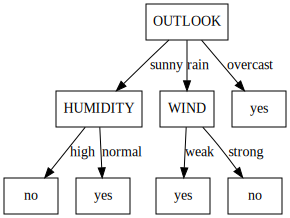

In [ ]:
# print(df['PLAY TENNIES'])
d=DecisionTree(df,"PLAY TENNIES")
# d.visualize()
# root=Tree(d.root)
# root.printTree()
graph = graphviz.Digraph(node_attr={'shape': 'rectangle'})
if d.root is not None:
  visualize(d.root, graph)
# graph.render('decision_tree.gv', view=True)
graph

# d.construct(df,"PLAY TENNIES")

# p=d.calculate_p(df,"PLAY TENNIES")
# p

# inf=d.information_gain(df,"HUMIDITY","PLAY TENNIES")
# inf
# sp=d.splitbycolumn(df,"PLAY TENNIES")
# sp
# len(pd)

In [ ]:
def predict(root,test):
  predictions=[]
  for _,row in test.iterrows():
    node=root
    while(node.name):
      feature=node.name
      val=row[feature]
      index=node.label.index(val)
      node=node.children[index]
    predictions.append(node.value)
  return predictions

def accuracy(actual,predicted):
  actual=list(actual)
  predicted=list(predicted)
  correct=0
  for i in range(len(actual)):
    if actual[i]==predicted[i]:
      correct+=1
  
  return (correct/len(actual))*100

# **GRAPH**

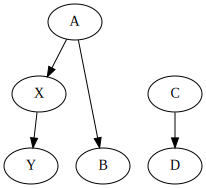

In [ ]:
def vis(root,graph):
  pass

d = graphviz.Digraph(filename='rank_same.gv')

with d.subgraph() as s:
    # s.attr(rank='same')
    # s.node('A')
    # s.node('X')
    s.edge('A','X')

d.node('C')

with d.subgraph() as s:
    s.attr(rank='same')
    s.node('B')
    s.node('D')
    s.node('Y')

d.edges(['AB', 'CD', 'XY'])
# d.edge('A','F')
# d.edge('A','C',label="C=1")
d

In [ ]:
# dataset=df
# dataset["PLAY TENNIES"].loc[0]
# new_dataset=dataset.drop("OUTLOOK",axis=1)
# new_dataset
l=np.arange(10)
l

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])